<a href="https://colab.research.google.com/github/VelociraptorAndCo/V_Digit_Detector/blob/main/MyRetinaWorks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **install**

In [ ]:
!git clone https://github.com/fizyr/keras-retinanet.git

Cloning into 'keras-retinanet'...
remote: Enumerating objects: 6209, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6209 (delta 0), reused 2 (delta 0), pack-reused 6205
Receiving objects: 100% (6209/6209), 13.48 MiB | 18.62 MiB/s, done.
Resolving deltas: 100% (4200/4200), done.


In [ ]:
!cd keras-retinanet && pip install . 

Processing /content/keras-retinanet
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for keras-retinanet: filename=keras_retinanet-1.0.0-cp37-cp37m-linux_x86_64.whl size=169507 sha256=92521f3027c5cbae904ddf616405790700c189a8c55719243ed8e83a5f0422ed
  Stored in directory: /root/.cache/pip/wheels/32/29/34/9b33c07f08b1be9e77607c1fc6b08c679489aa7ddaed329652
  Created wheel for keras-resnet: filename=keras_resnet-0.2.0-py2.py3-none-any.whl size=20486 sha256=3ddae2936afa91cb7ab542798ffa5d9c9e512a2bfc362abc7565bd000aaeda6e
  Stored in directory: /root/.cache/pip/wheels/bd/ef/06/5d65f696360436c3a423020c4b7fd8c558c09ef264a0e6c575
Successf

In [ ]:
!pip install keras-retinanet  --user

In [ ]:
!cd keras-retinanet && python setup.py build_ext --inplace  && python setup.py install 

running build_ext
cythoning keras_retinanet/utils/compute_overlap.pyx to keras_retinanet/utils/compute_overlap.c
/usr/local/lib/python3.7/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/keras-retinanet/keras_retinanet/utils/compute_overlap.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'keras_retinanet.utils.compute_overlap' extension
creating build
creating build/temp.linux-x86_64-3.7
creating build/temp.linux-x86_64-3.7/keras_retinanet
creating build/temp.linux-x86_64-3.7/keras_retinanet/utils
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -g -fwrapv -O2 -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/include/python3.7m -I/usr/local/lib/python3.7/dist-packages/numpy/core/includ

In [ ]:
#!pip install --upgrade git+https://github.com/broadinstitute/keras-resnet
!pip install keras-resnet
import keras
import keras_resnet 

In [ ]:
%cd keras-retinanet

/content/keras-retinanet


In [ ]:
import matplotlib.pyplot as plt

import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

# show images inline
%matplotlib inline

# automatically reload modules when they have changed
%load_ext autoreload
%autoreload 2

# import keras
from tensorflow import keras

# import keras_retinanet
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color
from keras_retinanet.utils.gpu import setup_gpu

# import miscellaneous modules
import cv2
import time

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **check**

!!

In [ ]:
!cd snapshots && curl -L -O https://github.com/fizyr/keras-retinanet/releases/download/0.5.1/resnet50_coco_best_v2.1.0.h5

# adjust this to point to your downloaded/trained model
# models can be downloaded here: https://github.com/fizyr/keras-retinanet/releases
#model_path = os.path.join('snapshots', 'resnet50_coco_best_v2.1.0.h5')
model_path = './snapshots/resnet50_coco_best_v2.1.0.h5'

# load retinanet model
model = models.load_model(model_path, backbone_name='resnet50')


# if the model is not converted to an inference model, use the line below
# see: https://github.com/fizyr/keras-retinanet#converting-a-training-model-to-inference-model
#model = models.convert_model(model)

#print(model.summary())

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  145M  100  145M    0     0  36.6M      0  0:00:03  0:00:03 --:--:-- 41.9M


processing time:  10.825243711471558
[384.9389  216.08484 695.34924 777.1515 ]
person 0.955
[4.5132813e-01 5.7199341e+02 4.9674930e+02 1.0227200e+03]
person 0.870
[ 736.31146  611.9829  1022.72    1018.55945]
person 0.517


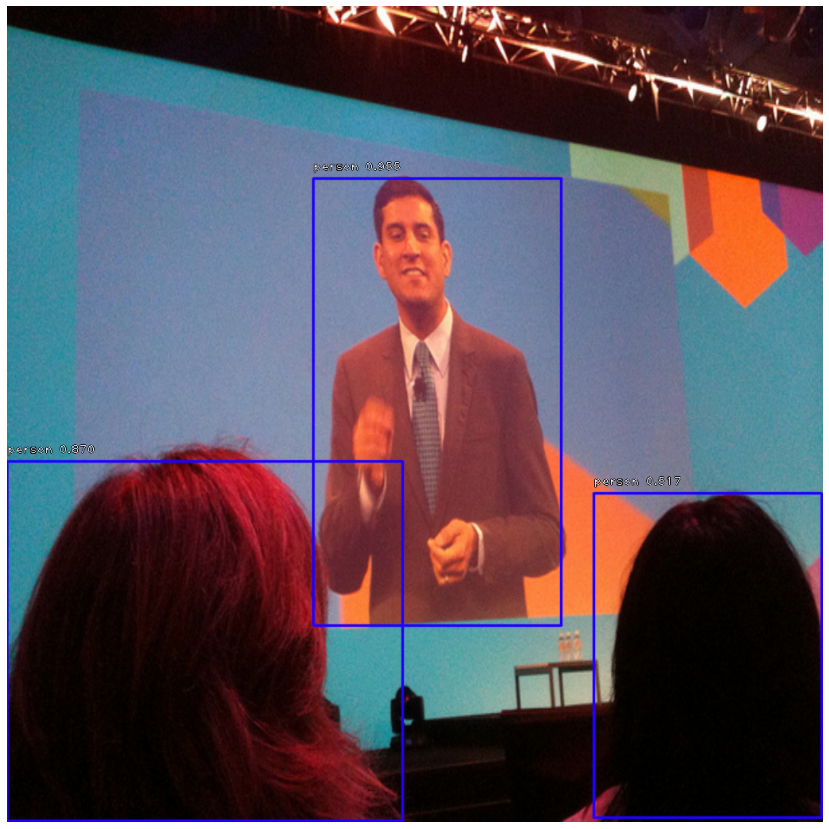

In [ ]:
# load image
img = read_image_bgr(os.path.join('examples','000000008021.jpg'))
image = cv2.resize(img, (1024,1024))
#image = cv2.transpose(image)

# copy to draw on
draw = image.copy()
draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

# preprocess image for network
image = preprocess_image(image)
image, scale = resize_image(image)

# process image
start = time.time()
boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))
print("processing time: ", time.time() - start)

# correct for image scale
boxes /= scale

# visualize detections
for box, score, label in zip(boxes[0], scores[0], labels[0]):
    # scores are sorted so we can break
    if score < 0.5:
        break
        
    color = label_color(label)
    
    b = box.astype(int)
    draw_box(draw, b, color=color)
    print(box)
    
    caption = "{} {:.3f}".format(labels_to_names[label], score)
    print(caption)
    draw_caption(draw, b, caption)
    
plt.figure(figsize=(15, 15))
plt.axis('off')
plt.imshow(draw)
plt.show()

# **Mnist**


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
mnist = pd.read_csv("/content/sample_data/mnist_train_small.csv")
#mnist.head()#num*28*28 from 0 to 19998
from random import randint
import cv2

In [ ]:
def mnistimg (n):
  from PIL import Image
  a = mnist.iloc[n]
  anum = a[0]
  a = a.reset_index(drop=True).drop([0]).to_numpy(dtype=np.uint8)
  a = a.reshape((28,28))
  #print(a.shape)
  #plt.imshow(np.stack((a,)*3, axis=-1))
  s = randint(32,50)
  image2 = Image.fromarray(a)
  a = np.asarray(image2.resize((s,s)))
  return (anum,s,a)

def intersect(x,y,s,xp,yp,sp):
  if xp>x+s : return False
  if x>xp+sp : return False
  if y>yp+sp : return False
  if yp>y+s : return False
  return True

def getimg():
  img = np.zeros((256,256), np.uint8)
  amount = randint(5,12)
  nums = []

  for i in range(amount):
    (num,s,a) = mnistimg(randint(0, 19998)) #!!!!!!!!! ssssss!!!!!!! Ниже не меняла что есть еще и размер
    while 1: 
      x = randint(0, 256-s)
      y = randint(0, 256-s)
      if not all([ not intersect(x,y,s,xp,yp,sp) for nump,sp,xp,yp in nums]): continue
      break
      #изменение масштаба
    img[x:x+s, y:y+s] = a
    nums.append([num,s,x,y])
  img = np.stack((img,)*3, axis=-1)
  return(nums,img)


def rotate(image, angle):
  # dividing height and width by 2 to get the center of the image
  height, width = image.shape[:2]
  # get the center coordinates of the image to create the 2D rotation matrix
  center = (width/2, height/2)  
  # using cv2.getRotationMatrix2D() to get the rotation matrix
  rotate_matrix = cv2.getRotationMatrix2D(center=center, angle=angle, scale=1)
  # rotate the image using cv2.warpAffine
  rotated_image = cv2.warpAffine(src=image, M=rotate_matrix, dsize=(width, height))
  #plt.imshow('Original image', image)
  #plt.imshow('Rotated image', rotated_image)
  return rotated_image

def getrotimg(maxangle):
  img = np.zeros((256,256), np.uint8)
  amount = randint(5,12)
  nums = []

  for i in range(amount):
    (num,s,a) = mnistimg(randint(0, 19998)) #!!!!!!!!! ssssss!!!!!!! Ниже не меняла что есть еще и размер
    while 1: 
      x = randint(0, 256-s)
      y = randint(0, 256-s)
      if not all([ not intersect(x,y,s,xp,yp,sp) for nump,sp,xp,yp in nums]): continue
      a = rotate(a, randint(-maxangle, maxangle))
      break
      #изменение масштаба
    img[x:x+s, y:y+s] = a
    nums.append([num,s,x,y])
  img = np.stack((img,)*3, axis=-1)
  return(nums,img)

[[2, 32, 108, 149], [1, 48, 185, 184], [9, 40, 77, 215], [0, 47, 24, 86], [8, 44, 69, 2], [8, 33, 21, 25], [1, 49, 121, 66]]


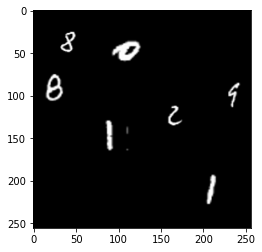

In [ ]:
nums,img = getimg()
print(nums)
#print(np.max(img))
plt.imshow(img)

[[3, 48, 123, 196], [4, 38, 65, 19], [8, 34, 75, 96], [3, 48, 167, 94], [2, 43, 206, 199], [4, 47, 0, 154], [3, 46, 72, 187], [2, 32, 125, 24], [9, 46, 1, 83], [0, 35, 131, 62]]


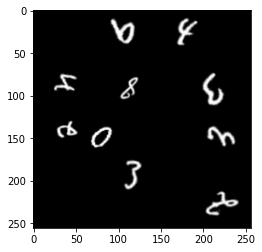

In [ ]:
nums,img = getrotimg(180)
print(nums)
#print(np.max(img))
plt.imshow(img)

In [ ]:
mapdf = pd.DataFrame([i for i in range(10)])
mapdf.to_csv('classes.csv', header = False)

Выходные данные были обрезаны до нескольких последних строк (5000).
-- 5014 --
-- 5015 --
-- 5016 --
-- 5017 --
-- 5018 --
-- 5019 --
-- 5020 --
-- 5021 --
-- 5022 --
-- 5023 --
-- 5024 --
-- 5025 --
-- 5026 --
-- 5027 --
-- 5028 --
-- 5029 --
-- 5030 --
-- 5031 --
-- 5032 --
-- 5033 --
-- 5034 --
-- 5035 --
-- 5036 --
-- 5037 --
-- 5038 --
-- 5039 --
-- 5040 --
-- 5041 --
-- 5042 --
-- 5043 --
-- 5044 --
-- 5045 --
-- 5046 --
-- 5047 --
-- 5048 --
-- 5049 --
-- 5050 --
-- 5051 --
-- 5052 --
-- 5053 --
-- 5054 --
-- 5055 --
-- 5056 --
-- 5057 --
-- 5058 --
-- 5059 --
-- 5060 --
-- 5061 --
-- 5062 --
-- 5063 --
-- 5064 --
-- 5065 --
-- 5066 --
-- 5067 --
-- 5068 --
-- 5069 --
-- 5070 --
-- 5071 --
-- 5072 --
-- 5073 --
-- 5074 --
-- 5075 --
-- 5076 --
-- 5077 --
-- 5078 --
-- 5079 --
-- 5080 --
-- 5081 --
-- 5082 --
-- 5083 --
-- 5084 --
-- 5085 --
-- 5086 --
-- 5087 --
-- 5088 --
-- 5089 --
-- 5090 --
-- 5091 --
-- 5092 --
-- 5093 --
-- 5094 --
-- 5095 --
-- 5096 --
-- 5097 --
-- 5098 

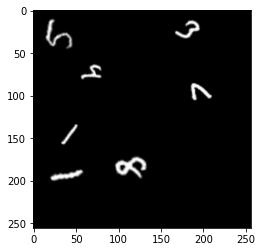

In [ ]:
imgdf = pd.DataFrame(columns = ['path/to/image.jpg','y1','x1','y2','x2','class_name'])

for i in range(10000):# num of imgs
  print('--',i,'--')
  nums,img = getrotimg(90)
  path = 'images/img'+str(i)+'.jpg'
  bul = cv2.imwrite(path,img)
  if not bul: print('ERROR')
  path1 =[]
  x1= []
  y1= []
  x2= []
  y2= []
  class_name = []
  for [num,s,x,y] in nums:
    path1.append(path)
    x1.append(x)
    y1.append(y)
    x2.append(x+s)
    y2.append(y+s)
    class_name.append(num)
  idf = pd.DataFrame({'path/to/image.jpg': path1,
                                      'y1' : y1,
                                      'x1' : x1,
                                      'y2' : y2,
                                      'x2' : x2,
                              'class_name' : class_name})
  imgdf = imgdf.append(idf)
print(imgdf)
plt.imshow(cv2.imread('images/img0.jpg'))
imgdf.to_csv('img.csv', header = False, index = False)

# **train**

In [ ]:
!cd snapshots && curl -L -O https://github.com/fizyr/keras-retinanet/releases/download/0.5.1/resnet50_coco_best_v2.1.0.h5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  145M  100  145M    0     0  25.7M      0  0:00:05  0:00:05 --:--:-- 26.1M


In [ ]:

# adjust this to point to your downloaded/trained model
# models can be downloaded here: https://github.com/fizyr/keras-retinanet/releases
model0_path = './snapshots/resnet50_coco_best_v2.1.0.h5'

# if the model is not converted to an inference model, use the line below
# see: https://github.com/fizyr/keras-retinanet#converting-a-training-model-to-inference-model
#model = models.convert_model(model)
#scales = '/content/drive/MyDrive/models/scales' '--config {scales}'


In [ ]:
!cp /content/drive/MyDrive/models/resnet50_csv_10.h5 ./snapshots 


In [ ]:
model0_path = './snapshots/resnet50_csv_10.h5'


In [ ]:
!retinanet-train  --freeze-backbone --random-transform --weights {model0_path} --batch-size 10 --steps 1000 --epochs 5 csv img.csv classes.csv

Creating model, this may take a second...
2022-05-18 19:43:19.458973: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
Model: "retinanet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1 (Conv2D)                 (No

In [ ]:
!cp ./snapshots/resnet50_csv_05.h5 /content/drive/MyDrive/models

# **check**

In [ ]:
!cp /content/drive/MyDrive/models/resnet50_csv_05.h5 ./snapshots 

In [ ]:
! pwd # хде я

/content/keras-retinanet


In [ ]:
#!retinanet-convert-model ./snapshots/resnet50_csv_05.h5 ./snapshots/detect.h5

In [ ]:
#!cd snapshots && curl -L -O https://github.com/fizyr/keras-retinanet/releases/download/0.5.1/resnet50_coco_best_v2.1.0.h5

# adjust this to point to your downloaded/trained model
# models can be downloaded here: https://github.com/fizyr/keras-retinanet/releases
#model_path = './snapshots/resnet50_csv_10.h5'
model_path = './snapshots/resnet50_csv_05.h5'
# load retinanet model
model = models.load_model(model_path, backbone_name='resnet50')
model = models.convert_model(model)
# if the model is not converted to an inference model, use the line below
# see: https://github.com/fizyr/keras-retinanet#converting-a-training-model-to-inference-model
#model = models.convert_model(model)

#print(model.summary())

IoU

In [ ]:
def iou(y_true, y_pred):
  # iou loss for bounding box prediction
    # input must be as [x1, y1, x2, y2]
    
    # AOG = Area of Groundtruth box
    AoG = K.abs(K.transpose(y_true)[2] - K.transpose(y_true)[0] + 1) * K.abs(K.transpose(y_true)[3] - K.transpose(y_true)[1] + 1)
    
    # AOP = Area of Predicted box
    AoP = K.abs(K.transpose(y_pred)[2] - K.transpose(y_pred)[0] + 1) * K.abs(K.transpose(y_pred)[3] - K.transpose(y_pred)[1] + 1)

    # overlaps are the co-ordinates of intersection box
    overlap_0 = K.maximum(K.transpose(y_true)[0], K.transpose(y_pred)[0])
    overlap_1 = K.maximum(K.transpose(y_true)[1], K.transpose(y_pred)[1])
    overlap_2 = K.minimum(K.transpose(y_true)[2], K.transpose(y_pred)[2])
    overlap_3 = K.minimum(K.transpose(y_true)[3], K.transpose(y_pred)[3])

    # intersection area
    intersection = (overlap_2 - overlap_0 + 1) * (overlap_3 - overlap_1 + 1)

    # area of union of both boxes
    union = AoG + AoP - intersection
    
    # iou calculation
    iou = intersection / union
    return iou

[[6, 39, 59, 34], [5, 38, 5, 90], [2, 33, 3, 158], [7, 48, 133, 184], [0, 36, 196, 54], [1, 42, 128, 75], [2, 49, 2, 205], [8, 48, 73, 82], [5, 35, 165, 128]]


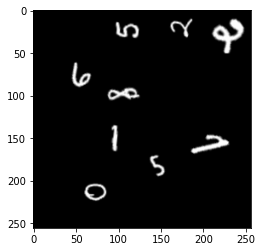

In [ ]:
nums,img = getrotimg(90)
#nums,img = getimg()
print(nums)
plt.imshow(img)

processing time:  3.8227596282958984
---
0 0.983
---
1 0.979
---
8 0.890
---
5 0.795
---
6 0.782
---
2 0.656
---
2 0.655
---
3 0.621
---
7 0.605
---
5 0.516
---
1 0.508


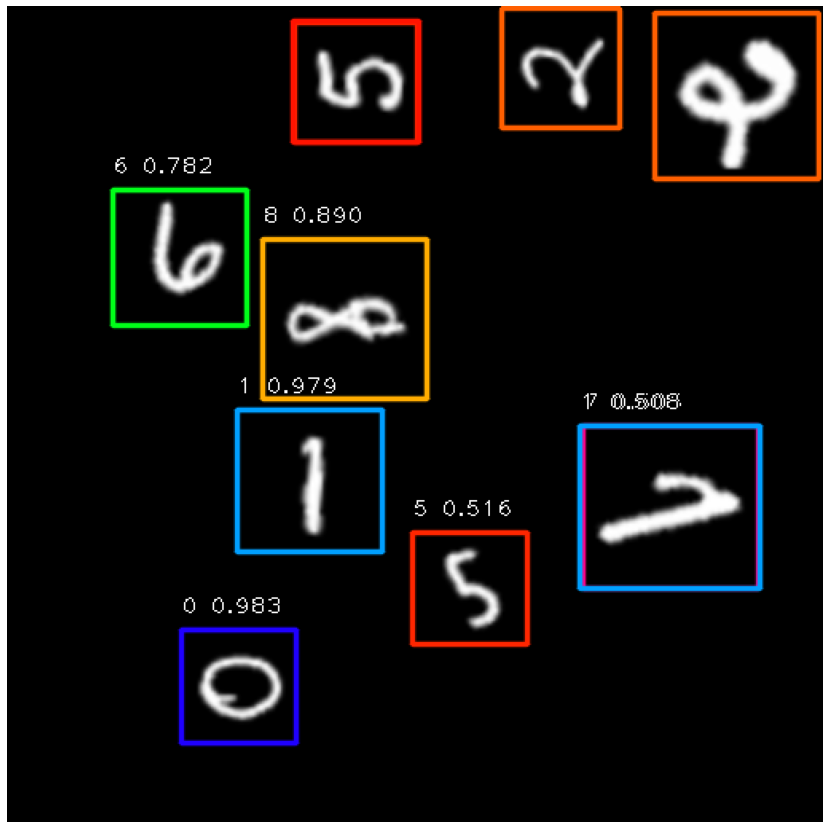

In [ ]:
image = cv2.resize(img, (512,512))
#image = cv2.transpose(image)
#image = img
# copy to draw on
draw = image.copy()
draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

# preprocess image for network
image = preprocess_image(image)
image, scale = resize_image(image)

# process image
start = time.time()
boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))
print("processing time: ", time.time() - start)

# correct for image scale
boxes /= scale

# visualize detections
for box, score, label in zip(boxes[0], scores[0], labels[0]):
    # scores are sorted so we can break
    if score < 0.5:
        break
        
    color = label_color(label)
    
    b = box.astype(int)
    draw_box(draw, b, color=color)
    print('---')
    caption = "{} {:.3f}".format(label, score)
    print(caption)
    draw_caption(draw, b, caption)
    
plt.figure(figsize=(15, 15))
plt.axis('off')
plt.imshow(draw)
plt.show()

In [ ]:
'''https://github.com/fizyr/keras-retinanet/blob/main/keras_retinanet/losses.py'''